In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
first = np.array(Image.open('/content/first_frame.png').convert('L'))
second = np.array(Image.open('/content/second_frame.png').convert('L'))

In [3]:
#Three step search
#Step 1 - Search at 8 locations +/- 4 pixels including 0,0
#Step 2 - Search at 8 locations +/- 2 pixels including best match location
# Step 3 - Search at 8 location ±1 pixels around best match location in Step 2 including best match location.

In [4]:
def MAD(block1,block2):
  M,N = block1.shape
  return np.sum(abs(block1 - block2))/(M*N)

In [5]:
def divide_blocks(img):
  M,N = img.shape
  blocks = []
  for i in range(0,M,16):
    for j in range(0,N,16):
      blocks.append(img[i:i+16,j:j+16])
  return np.array(blocks)

In [6]:
blocks = divide_blocks(first)

In [7]:
def match_locations(x,y,size,pad):
  locs = np.zeros((9,2),dtype='int')
  count = 0
  for i in range(-size,size+1,size):
    for j in range(-size,size+1,size):
      locs[count] = (x+i-pad),(y+j-pad)
      count+=1
  return locs 

In [8]:
def match_locations(x,y,size):
  locs = np.zeros((9,2),dtype='int')
  count = 0
  for i in range(-size,size+1,size):
    for j in range(-size,size+1,size):
      locs[count] = (x+i),(y+j)
      count+=1
  return locs 

In [9]:
def get_search_block(img,x,y,size):
  block = np.zeros((16,16))
  M,N = img.shape
  for i in range(16):
    for j in range(16):
      if (x + i -(size/2))<0 or (y+j-(size/2))<0:
        block[i,j] = 0
      elif (x + i -(size/2))>=M or (y+j-(size/2))>=N:
        block[i,j] = 0
      else:
        block[i,j] = img[int(x + i -(size/2)),int(y+j-(size/2))]
  return block


3 step search function

In [10]:
#
def step1(img1,img2):
  M,N = img1.shape
  K,L = img2.shape
  top_left_centre_x,top_left_centre_y = (8,8)
  # padding = top_left_centre_x - 4
  # img2_1 = np.pad(img2,(padding,padding),'constant')
  best_matches_step1 = []
  count = 0
  for i in range(0,M,16):
    for j in range(0,N,16):
      block = img1[i:i+16,j:j+16]
      centre_x,centre_y = (int(i+8),int(j+8))
      # print(centre_x,centre_y)
      locs = np.zeros((9,2))
      locs = match_locations(centre_x,centre_y,4)
      # print(locs)
      best_match = np.zeros((1,2))
      dist = np.inf
      for k in range(locs.shape[0]):
        c_x,c_y = locs[k]
        # print(c_x,c_y)
        block2 = get_search_block(img2,c_x,c_y,16)
        dist2 = MAD(block,block2)
        # print(dist2)
        if dist2<dist:
          # best_match = np.zeros((1,2))
          best_match = c_x,c_y
          dist = dist2
          # print(best_match)
        # break
      best_matches_step1.append(best_match)
  # return best_matches_step1
    # count +=1

  #Step 2
  best_matches_step2 = []
  count = 0 
  for i in range(0,M,16):
    for j in range(0,N,16):
      block = img1[i:i+16,j:j+16]
      centre_x,centre_y = best_matches_step1[count]
      locs = np.zeros((9,2))
      locs = match_locations(centre_x,centre_y,2)
      best_match = np.zeros((1,2))
      dist = np.inf
      for k in range(locs.shape[0]):
        c_x,c_y = locs[k]
        # print(c_x,c_y)
        block2 = get_search_block(img2,c_x,c_y,16)
        dist2 = MAD(block,block2)
        # print(dist2)
        if dist2<dist:
          # best_match = np.zeros((1,2))
          best_match = c_x,c_y
          dist = dist2
          # print(best_match)
        # break
      best_matches_step2.append(best_match)
      count = count + 1
  
  #Step3
  best_matches_step3 = []
  count2 = 0
  for i in range(0,M,16):
    for j in range(0,N,16):
      block = img1[i:i+16,j:j+16]
      centre_x,centre_y = best_matches_step2[count2]
      locs = np.zeros((9,2))
      locs = match_locations(centre_x,centre_y,2)
      best_match = np.zeros((1,2))
      dist = np.inf
      for k in range(locs.shape[0]):
        c_x,c_y = locs[k]
        # print(c_x,c_y)
        block2 = get_search_block(img2,c_x,c_y,16)
        dist2 = MAD(block,block2)
        # print(dist2)
        if dist2<dist:
          # best_match = np.zeros((1,2))
          best_match = c_x,c_y
          dist = dist2
          # print(best_match)
        # break
      best_matches_step3.append(best_match)
      count2 = count2 + 1
  
  return np.array(best_matches_step3)




In [11]:
centers = []
for i in range(0,144,16):
  for j in range(0,176,16):
    # block = img[i:i+16,j:j+16]
    centre_x,centre_y = (int(i+8),int(j+8))
    centers.append([centre_x,centre_y])


In [12]:
centers = np.array(centers)
centers.shape


(99, 2)

In [13]:
best = step1(first,second)

In [14]:
def plot_motion_arrows(img,block_centers,best_matches):
  dx = best_matches[:,1] - block_centers[:,1] 
  dy = best_matches[:,0] - block_centers[:,0]
  x = block_centers[:,1]
  y = block_centers[:,0]
  plt.imshow(img)
  for i in range(99):
    plt.arrow(x[i],y[i],dx[i],dy[i],width = 0.5)
  plt.show()

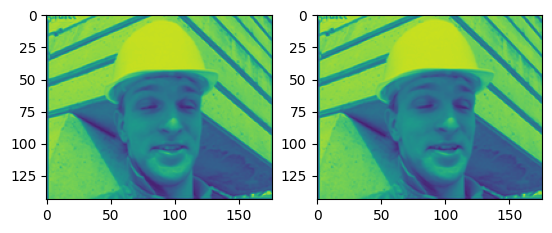

In [15]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(first)
ax[1].imshow(second)

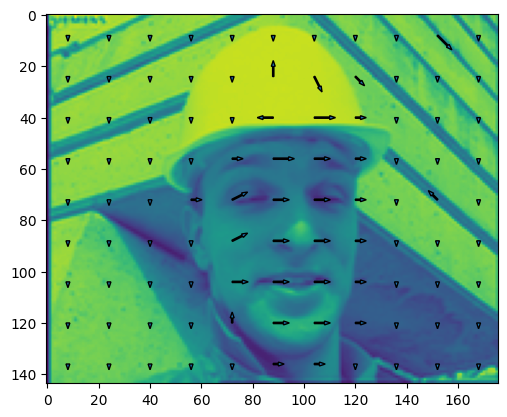

In [16]:
plot_motion_arrows(first,centers,best)

In [17]:
def motion_predicted_frame(img,best_matches):
  M,N = img.shape
  img1 = np.zeros(img.shape)
  count = 0
  for i in range(0,M,16):
    for j in range(0,N,16):
      centre_x,centre_y = int(i+8),int(j+8)
      dx,dy = centre_x - best_matches[count,0],centre_y - best_matches[count,1]
      # print(dx,dy)
      x_cor = np.arange(i,i+16)
      y_cor = np.arange(j,j+16)
      old_cor = np.meshgrid(x_cor,y_cor)
      new_cor = np.meshgrid(x_cor-dx,y_cor-dy)
      K,L = new_cor[0].shape
      for m in range(K):
        for n in range(L):
          # min_x,max_x = min(new_cor[0][m]),max(new_cor[0][m])
          # min_y,max_y = min(new_cor[1][n]),max(new_cor[1][n])
          # if min_x>=0 and max_x<M and min_y>=0 and max_y<N:
          #   img1[new_cor] = img[old_cor]
          old_x_cor = old_cor[0][m][n]
          old_y_cor = old_cor[1][m][n]
          new_x_cor = new_cor[0][m][n]
          new_y_cor = old_cor[1][m][n]
          if 0<=new_x_cor<M and 0<=new_y_cor<N:
            img1[new_x_cor,new_y_cor] = img[old_x_cor,old_y_cor]
          # break
      count = count + 1

  return img1

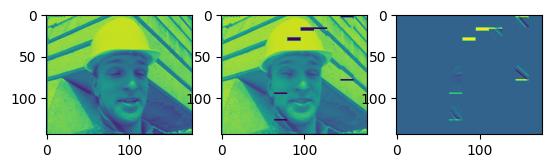

In [21]:
#Predicted frame
predict = motion_predicted_frame(first,best)

fig,ax = plt.subplots(1,3)
ax[0].imshow(second)
ax[1].imshow(predict)
ax[2].imshow(first-predict)

In [19]:
#Error
MAD(second,predict)

7.622001262626263